**Курсовая работа**

**Выполнил студент группы 7391**

**Посвященный Дмитрий Евгеньевич**

# Исходные данные

Система управления разрабатывается для обеспечения желаемого уровня температурыв помещении, заданной пользователем кондиционера.

В объекте управления имеется 2 датчика и один исполнительный механизм:
- датчик температуры теплоносителя
-датчик температуры в помещении
-нагревательный элемент

Динамика показаний датчиков описывается следующей моделью:


---


$\dot T2 = -18T1-0.1T2^3+dT20+{cos(2T2+4)} -6 $,

$\dot T1 = -0.1T1^3+5T1{sin(8T2+7)+30tanh(I)+6}$,


---


где $T1$ - температура теплоносителя, $T2$ - температура в помещении, $I$ - сила тока, протекающего через нагревательный элемент, $dT20 \in [9, 19]$ - неконтролируемое возмущение в системе.

# Ход работы

Чтобы корректно провести процедуру автоматического синтеза, необходимо упростить модель.

В окрестности нуля гиперболический тангенс - линейная функция.
Таким образом выражение 30tanh(I) упрощается до 30I.

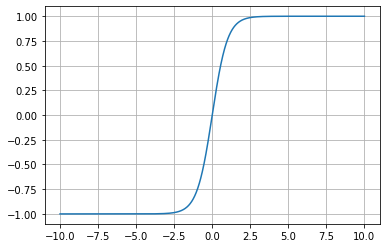

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

dt = np.linspace(-10, 10, 1000)

plt.grid()
plt.plot(dt, np.tanh(dt))
plt.show()

In [ ]:
import sympy

T2=sympy.symbols('T2')
T1=sympy.symbols('T1')
dT20=sympy.symbols('dT20')
I=sympy.symbols('I')
G = sympy.symbols("G")

dT2 = -18*T1-0.1*T2**3+dT20+sympy.cos(2*T2+4)-6
dT1 = -0.1*T1**3+5*T1*sympy.sin(8*T2+7)+G*I+6

print('Модель системы:')
print('dT2/dt = ' + str(dT2))
print('dT1/dt = ' + str(dT1))

Модель системы:
dT2/dt = -18*T1 - 0.1*T2**3 + dT20 + cos(2*T2 + 4) - 6
dT1/dt = G*I - 0.1*T1**3 + 5*T1*sin(8*T2 + 7) + 6


# Эталонная модель системы

$\dot T2_d = T2_d - T2$

$\dot T2 - \dot T2_d = 0$

In [ ]:
from sympy.solvers import solve
T2d=sympy.symbols("T2_d")

DT2d = T2d  - T2
T1D=solve(dT2-DT2d, T1)

print(str(T1D))

[-0.00555555555555556*T2**3 + 0.0555555555555556*T2 - 0.0555555555555556*T2_d + 0.0555555555555556*dT20 + 0.0555555555555556*cos(2.0*T2 + 4.0) - 0.333333333333333]


Получена желаемая функция управления для эталонной модели **T2d = -T2 + T2_d**:

$T1 = -0.00555555555555556*T2^3 + 0.0555555555555556*T2 - 0.0555555555555556*T2_d + 0.0555555555555556*dT20 + 0.0555555555555556*cos(2*T2 + 4.0) - 0.333333333333333$


# Функция выхода

$\psi = T1_d - T1$


 ${\dot \psi} = \frac{d \psi}{d T2}{\dot T2} + \frac{d \psi}{d T1}{\dot T1}$

Эталонная модель функции выхода:

$\psi+{\dot \psi}$ = 0

In [ ]:
psi = T1D[0] - T1
dpsi = sympy.diff(psi, T2)*dT2 + sympy.diff(psi, T1)*dT1
i = solve(sympy.expand(dpsi+psi), I)
i_analytical = i[0]
print(str(psi)+'\n')
print(i_analytical)

-T1 - 0.00555555555555556*T2**3 + 0.0555555555555556*T2 - 0.0555555555555556*T2_d + 0.0555555555555556*dT20 + 0.0555555555555556*cos(2.0*T2 + 4.0) - 0.333333333333333

0.000555555555555556*(180.0*T1**3 + 540.0*T1*T2**2 + 3600.0*T1*sin(2.0*T2 + 4.0) - 9000.0*T1*sin(8.0*T2 + 7.0) - 3600.0*T1 + 3.0*T2**5 + 20.0*T2**3*sin(2.0*T2 + 4.0) - 20.0*T2**3 - 30.0*T2**2*dT20 - 30.0*T2**2*cos(2.0*T2 + 4.0) + 180.0*T2**2 + 100.0*T2 - 100.0*T2_d - 200.0*dT20*sin(2.0*T2 + 4.0) + 200.0*dT20 + 1200.0*sin(2.0*T2 + 4.0) - 100.0*sin(4.0*T2 + 8.0) + 200.0*cos(2.0*T2 + 4.0) - 12000.0)/G


**Закон управления по методу АКАР для $\psi$ :**

$\psi = -T1 - 0.00555555555555556*T2^3 + 0.0555555555555556*T2 - 0.0555555555555556*T2_d + 0.0555555555555556*dT20 + 0.0555555555555556*cos(2.0*T2 + 4.0) - 0.333333333333333$

**Функция управления:**

$I = 0.000555555555555556*(180.0*T1^3 + 540.0*T1*T2^2 + 3600.0*T1*sin(2.0*T2 + 4.0) - 9000.0*T1*sin(8.0*T2 + 7.0) - 3600.0*T1 + 3.0*T2^5 + 20.0*T2^3*sin(2.0*T2 + 4.0) - 20.0*T2^3 - 30.0*T2^2*dT20 - 30.0*T2^2*cos(2.0*T2 + 4.0) + 180.0*T2^2 + 100.0*T2 - 100.0*T2_d - 200.0*dT20*sin(2.0*T2 + 4.0) + 200.0*dT20 + 1200.0*sin(2.0*T2 + 4.0) - 100.0*sin(4.0*T2 + 8.0) + 200.0*cos(2.0*T2 + 4.0) - 12000.0)/G$



# Численное моделирование системы ОДУ

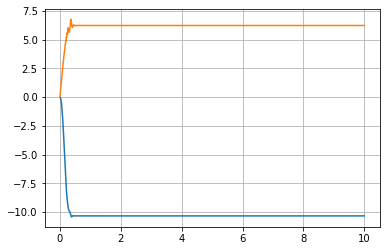

In [ ]:
import scipy.integrate as mdl

dT20 = 9.0
I = 1.0

def F(x, t, I):

  T2, T1 = x
  return [-18*T1 - 0.1*math.pow(T2, 3)+dT20+math.cos(2*T2+4)-6,
          -0.1*math.pow(T1, 3)+5*T1*math.sin(8*T2+7)+30*math.tanh(I)+6]

t = np.linspace(0, 10, 10000)
y = mdl.odeint(F, [0, 0], t, args=(I,))

plt.plot(t, y)
plt.grid()
plt.show()

# **Моделирование САУ с цифровым ПИ-регулятором**

Ниже представлен базовый класс для моделирования работы контроллера

In [ ]:
import math
import numpy
import matplotlib.pyplot as plt
import scipy.integrate as mdl

class PLC:
    def __init__(self, gain, step):
        self.last_t = 0.0
        self.last_call_t = 0.0
        self.last_u = 0
        self.step = step
        self.last_e = 0.0
        self.gain = gain
        self.u = []
        self.ulim = []
        self.t = []
    #ограничивающее воздействие
    def getLimitedOutput(self,value):
        return math.tanh(value)

    #накопление всех уравляющих воздействий для траектории
    def addOutputValue(self,time,value):
        self.t.append(time)
        self.u.append(value)
        self.ulim.append(self.getLimitedOutput(value))
    #вычисление, программа моделирования реализована в control
    def output(self, x, t):
        self.addOutputValue(t, self.last_u)
        self.last_u = self.control(x, t)
        self.last_t = t
        self.addOutputValue(t,self.last_u)

        return self.gain*self.ulim[-1]

def calculate(func, x0, step, time, plc):
    result = {'t': [], 'u':[]}
    for i in range(0,len(x0)):
        result['x' + str(i + 1)] = []
    rstep = plc.step
    ode_step = step
    timev = numpy.linspace(0.0, time, int(time/rstep+1))
    #разбили на участки
    for ti in timev:
        #управляющее воздействие участка
        uk = plc.output(x0, ti)
        #генерация новой маленькой сетки для интервала
        tk = numpy.linspace(ti, ti+rstep, int(rstep/ode_step+1))
        # проводит моделирование (рассчитывает траекторию для этого участка)
        y = mdl.odeint(func(uk), x0, tk)
        #присоединение участка к итоговому результату
        x0 = y[-1]
        result['t'].extend(tk[:-1])
        for i in range(0,len(x0)):
            result['x' + str(i + 1)].extend(y[:-1,i])
        result['u'].extend([uk for i in tk[:-1]])
    return result


Правая часть дифференциального уравнения объекта со ступенчатым изменением параметра

In [ ]:
def F_with_change(step_time, init_value, finish_value):
    #функия с параметром управляющего воздействия
    def F_with_control(uc):
        #функция моделирования траектории
        def F_internal(x, t):
            T2, T1 = x
            if t > step_time:
                dT20 = finish_value
            else:
                dT20 = init_value
            return [ -18*T1-0.1*T2**3+dT20+math.cos(2*T2+4)-6,
                    -0.1*T1**3+5*T1*math.sin(8*T2+7)+6+uc]

        return F_internal
    return F_with_control

Реализация алгоритма ПИ-регулирования

In [ ]:
class PI(PLC):
    def __init__(self, goal, Kp, Ki, gain, step):
        super(PI,self).__init__(gain, step)
        self.Ki = Ki
        self.Kp = Kp
        self.goal = goal
        self.ei = 0

    def control(self, x, t):
        #е ошибка - разница между dm и значением оператора урпавления
        #ei - внутренняя ошибка интегрирования
        e = x[0] - self.goal
        #вычисление интегральной компоненты
        self.ei = self.ei + e
        return self.Kp * e + self.Ki * self.ei

Вывод результатов моделирования

In [ ]:
def plot_result(time, time_end, x1, x2, plc, goal):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.grid()
    plt.xlim(0, time_end)
    plt.plot(time,x1, 'r-', time, x2, 'b-')
    plt.plot([0, time_end], [goal, goal], color='#FF0000',linestyle='--')
    plt.subplot(1,2,2)
    plt.grid()
    plt.xlim(0, time_end)
    plt.plot(plc.t, plc.u,'b-',plc.t,plc.ulim,'r-')
    plt.plot([0, tk], [1, 1], 'r--',[0, tk], [-1, -1], 'r--',[0, tk],[0, 0],'r:')
    plt.show()

Программа моделирования

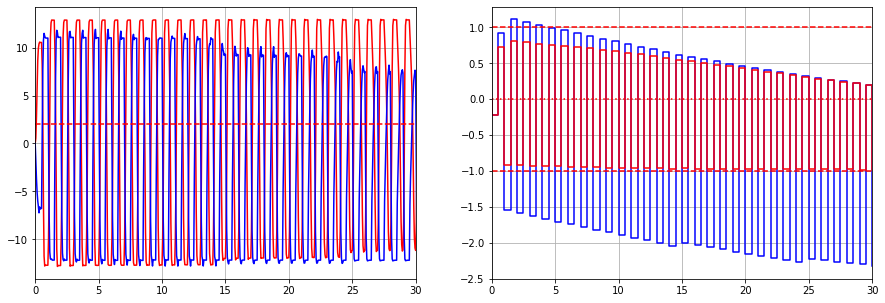

In [ ]:
dT20_init = 0
dT20_finish = 1
change_time = 9
goal = 2
gain = 200
step = 0.5
mod_step = 0.05
func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)

plc=PI(goal=goal, Kp=0.1, Ki=0.01, gain=gain, step=step)
tk=30
x0=[0, 0]
res = calculate(func_ctrl, x0, mod_step, tk, plc)
plot_result(time=res['t'], time_end=tk, x1=res['x1'], x2=res['x2'], plc=plc, goal=goal)

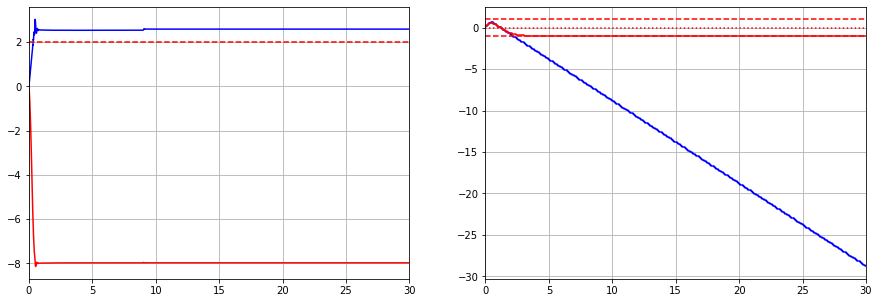

In [ ]:
dT20_init = 0
dT20_finish = 1
change_time = 9
goal = 2
gain = 1
step = 0.1
mod_step = 0.01
func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)

plc=PI(goal=goal, Kp=-0.1, Ki=0.01, gain=gain, step=step)
tk=30
x0=[0, 0]
res = calculate(func_ctrl, x0, mod_step, tk, plc)
plot_result(time=res['t'], time_end=tk, x1=res['x1'], x2=res['x2'], plc=plc, goal=goal)

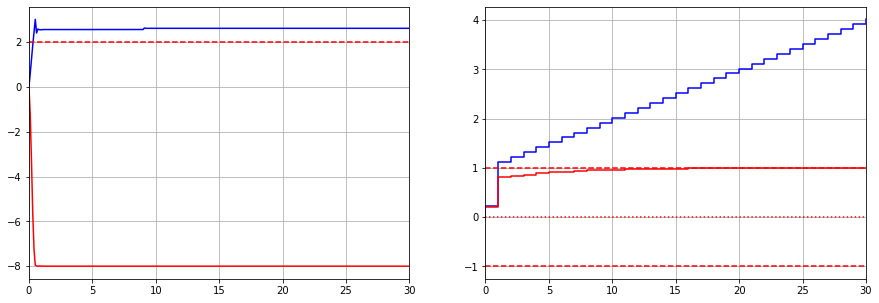

In [ ]:
dT20_init = 0
dT20_finish = 1
change_time = 9
goal = 2
gain = 1
step = 1
mod_step = 0.1
func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)

plc=PI(goal=goal, Kp=-0.1, Ki=-0.01, gain=gain, step=step)
tk=30
x0=[0, 0]
res = calculate(func_ctrl, x0, mod_step, tk, plc)
plot_result(time=res['t'], time_end=tk, x1=res['x1'], x2=res['x2'], plc=plc, goal=goal)

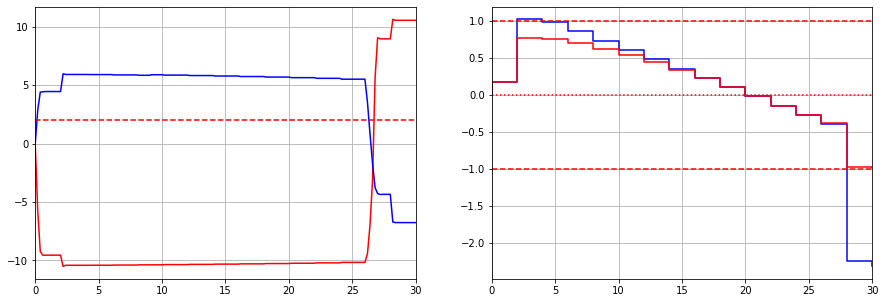

In [ ]:
dT20_init = 0
dT20_finish = 1
change_time = 9
goal = 2
gain = 50
step = 2
mod_step = 0.2
func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)

plc=PI(goal=goal, Kp=-0.1, Ki=0.01, gain=gain, step=step)
tk=30
x0=[0, 0]
res = calculate(func_ctrl, x0, mod_step, tk, plc)
plot_result(time=res['t'], time_end=tk, x1=res['x1'], x2=res['x2'], plc=plc, goal=goal)

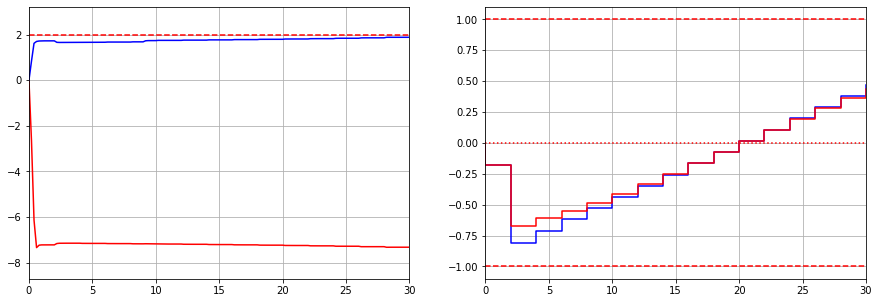

In [ ]:
dT20_init = 0
dT20_finish = 1
change_time = 9
goal = 2
gain = 10
step = 2
mod_step = 0.2
func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)

plc=PI(goal=goal, Kp=0.1, Ki=-0.01, gain=gain, step=step)
tk=30
x0=[0, 0]
res = calculate(func_ctrl, x0, mod_step, tk, plc)
plot_result(time=res['t'], time_end=tk, x1=res['x1'], x2=res['x2'], plc=plc, goal=goal)

Моделируемый объект является нелинейным и опираясь на эксперименты, проведенные выше, можно сделать вывод, что управления через ПИ-регулятор нет

#**Метод АКАР с интегральной адаптацией**

Закон управления, синтезированный по методу АКАР:

$I = 0.000555555555555556*(180.0*T1^3 + 540.0*T1*T2^2 + 3600.0*T1*sin(2.0*T2 + 4.0) - 9000.0*T1*sin(8.0*T2 + 7.0) - 3600.0*T1 + 3.0*T2^5 + 20.0*T2^3*sin(2.0*T2 + 4.0) - 20.0*T2^3 - 30.0*T2^2*dT20 - 30.0*T2^2*cos(2.0*T2 + 4.0) + 180.0*T2^2 + 100.0*T2 - 100.0*T2_d - 200.0*dT20*sin(2.0*T2 + 4.0) + 200.0*dT20 + 1200.0*sin(2.0*T2 + 4.0) - 100.0*sin(4.0*T2 + 8.0) + 200.0*cos(2.0*T2 + 4.0) - 12000.0)/G$

In [ ]:
class AKAR(PLC):
    def __init__(self, goal, gain, dtu, dT2_0):
        super(AKAR,self).__init__(gain, dtu)
        self.G=gain
        self.T2_d=goal
        self.dT20=dT2_0

    def control(self, x, t):
        T2, T1 = x
        dT20 = self.dT20
        return (0.000555555555555556*(180.0*T1**3 + 540.0*T1*T2**2 + 3600.0*T1*math.sin(2.0*T2 + 4.0)
        - 9000.0*T1*math.sin(8.0*T2 + 7.0) - 3600.0*T1 + 3.0*T2**5 + 20.0*T2**3*math.sin(2.0*T2 + 4.0) - 20.0*T2**3 - 30.0*T2**2*dT20 -
        30.0*T2**2*math.cos(2.0*T2 + 4.0) + 180.0*T2**2 + 100.0*T2 - 100.0*self.T2_d - 200.0*dT20*math.sin(2.0*T2 + 4.0) + 200.0*dT20 +
        1200.0*math.sin(2.0*T2 + 4.0) - 100.0*math.sin(4.0*T2 + 8.0) + 200.0*math.cos(2.0*T2 + 4.0) - 12000.0)/self.G)

Моделирование

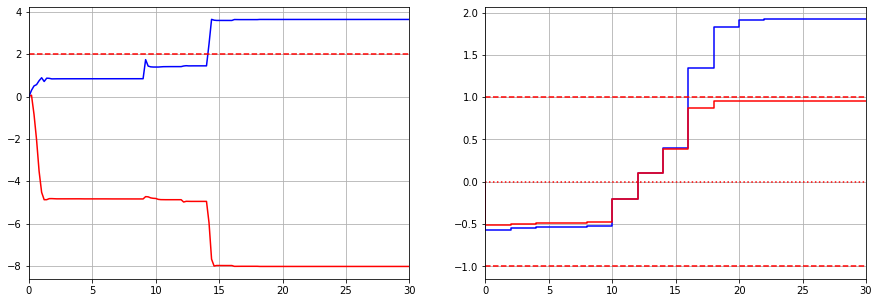

In [ ]:
dT20_init = 9
dT20_finish = 19
change_time = 9
goal = 2
gain = 10
step = 2
mod_step = 0.2
tk=30
x0=[0, 0]
func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)

plc = AKAR(goal=goal, gain=gain, dtu=step, dT2_0=dT20_init)
res = calculate(func_ctrl, x0, mod_step, tk, plc)
plot_result(time=res['t'], time_end=tk, x1 = res['x1'], x2 = res['x2'], plc=plc, goal=goal)

Уравнения системы:



---


$\dot T2 = -18T1-0.1T2^3+dT20+{cos(2T2+4)} -6 $,

$\dot T1 = -0.1T1^3+5T1{sin(8T2+7)+30tanh(I)+6}$,


---


Функции макропеременных:

$\psi_1 = T2 - T2_d$

$\psi_2 = \psi_1 + z = T2 - T2_d + z$

$\psi_3 = T1_{internal} - T1$

Эталонные модели:

$T_1 \dot \psi_2 + \psi_2 = 0$

$T_3 \dot \psi_3 + \psi_3 = 0$

Интегральная компонента:

$\dot z = \frac 1 {T_2} \psi_1$

In [ ]:
import sympy
from sympy.functions import exp
from sympy.solvers import solve

# Символьные переменные:
T2=sympy.symbols('T2')
T1=sympy.symbols('T1')
dT20=sympy.symbols('dT20')
I=sympy.symbols('I')
G = sympy.symbols("G")
T2d=sympy.symbols('T2d')
z = sympy.symbols('z')
T_1 = sympy.symbols('T_1')
T_2 = sympy.symbols('T_2')
T_3 = sympy.symbols('T_3')

# Уравнения системы:
dT2 = -18.0*T1-0.1*T2**3+dT20+sympy.cos(2.0*T2+4.0)-6.0
dT1 = -0.1*T1**3+5.0*T1*sympy.sin(8.0*T2+7.0)+G*I+6.0

# Функции макропеременных psi1 и psi2:
psi_1 = T2 - T2d
psi_2 = psi_1 + z

# Интегральная компонента:
dz = 1/T_2*psi_1

# Вычисление производной dpsi2/dt:
dpsi_2 = sympy.diff(psi_2, T2)*dT2 + sympy.diff(psi_2, z)*dz

# Эталонная модель для вычисления T1_internal:
model1 = T_1 * dpsi_2 + psi_2

# Нахождение T1_internal:
T1i = solve(sympy.expand(model1), T1)
print(f"Производная dz/dt = {dz}")
print(f"Закон внутреннего управления T1_internal = {str(T1i[0])}")

# Функция макропеременной psi3 и ее производная по времени:
psi_3 = T1i[0] - T1
dpsi_3 = sympy.diff(psi_3, T2)*dT2 + sympy.diff(psi_3, T1)*dT1 + sympy.diff(psi_3, z)*dz

# Эталонная модель для нахождения управляющего воздействия:
model2 = T_3*dpsi_3 + psi_3

# Нахождение I:
i = solve(sympy.expand(model2), I)
i_analytical = i[0]
print(f"Закон управления I = {str(sympy.expand(i_analytical))}")

Производная dz/dt = (T2 - T2d)/T_2
Закон внутреннего управления T1_internal = 0.00555555555555556*(T_1*T_2*(-T2**3 + 10.0*dT20 + 10.0*cos(2.0*T2 + 4.0) - 60.0) + 10.0*T_1*(T2 - T2d) + 10.0*T_2*(T2 - T2d + z))/(T_1*T_2)
Закон управления I = 0.1*T1**3/G + 0.3*T1*T2**2/G + 2.0*T1*sin(2.0*T2 + 4.0)/G - 5.0*T1*sin(8.0*T2 + 7.0)/G - 1.0*T1/(G*T_3) - 1.0*T1/(G*T_2) - 1.0*T1/(G*T_1) + 0.00166666666666667*T2**5/G + 0.0111111111111111*T2**3*sin(2.0*T2 + 4.0)/G - 0.00555555555555556*T2**3/(G*T_3) - 0.00555555555555556*T2**3/(G*T_2) - 0.00555555555555556*T2**3/(G*T_1) - 0.0166666666666667*T2**2*dT20/G - 0.0166666666666667*T2**2*cos(2.0*T2 + 4.0)/G + 0.1*T2**2/G + 0.0555555555555556*T2/(G*T_2*T_3) + 0.0555555555555556*T2/(G*T_1*T_3) + 0.0555555555555556*T2/(G*T_1*T_2) - 0.0555555555555556*T2d/(G*T_2*T_3) - 0.0555555555555556*T2d/(G*T_1*T_3) - 0.0555555555555556*T2d/(G*T_1*T_2) - 0.111111111111111*dT20*sin(2.0*T2 + 4.0)/G + 0.666666666666667*sin(2.0*T2 + 4.0)/G - 0.0555555555555556*sin(4.0*T2 + 8.0)

Подпрограмма для реализации нелинейного регулятора с интегральной компонентой

In [ ]:
class AKAR_i(PLC):
    def __init__(self, goal, gain, dt, T1, T2, T3, dT20):
        super(AKAR_i,self).__init__(gain, dt)
        self.dt = dt
        self.G=gain
        self.T2d=goal
        self.T1 = T1
        self.T2 = T2
        self.T3 = T3
        self.dT20 = dT20
        self.z = []
        self.zt = []

    def control(self, x, t):
        T2, T1 = x
        #T1-T3 - параметры эталонной модели, соотв. постоянной времени, T2-интегральная компонента
        T_1 = self.T1
        T_2 = self.T2
        T_3 = self.T3
        T2d = self.T2d
        G = self.G
        dT20 = self.dT20
        dt = self.dt

        if len(self.z) < 1:
            z = 0.0
        else:
            z = self.z[-1] + dt/T_2*(T2 - T2d)
        self.z.append(z)
        self.zt.append(t)
        return (0.1*T1**3/self.G + 0.3*T1*T2**2/self.G + 2.0*T1*math.sin(2.0*T2 + 4.0)/self.G - 5.0*T1*math.sin(8.0*T2 + 7.0)/self.G
                - 1.0*T1/(self.G*T_3) - 1.0*T1/(self.G*T_2) - 1.0*T1/(self.G*T_1) + 0.00166666666666667*T2**5/self.G + 0.0111111111111111*T2**3*math.sin(2.0*T2 + 4.0)/self.G
                - 0.00555555555555556*T2**3/(self.G*T_3) - 0.00555555555555556*T2**3/(self.G*T_2) - 0.00555555555555556*T2**3/(self.G*T_1) - 0.0166666666666667*T2**2*dT20/self.G
                - 0.0166666666666667*T2**2*math.cos(2.0*T2 + 4.0)/self.G + 0.1*T2**2/self.G + 0.0555555555555556*T2/(self.G*T_2*T_3) + 0.0555555555555556*T2/(self.G*T_1*T_3)
                + 0.0555555555555556*T2/(self.G*T_1*T_2) - 0.0555555555555556*T2d/(self.G*T_2*T_3) - 0.0555555555555556*T2d/(self.G*T_1*T_3) - 0.0555555555555556*T2d/(self.G*T_1*T_2)
                - 0.111111111111111*dT20*math.sin(2.0*T2 + 4.0)/self.G + 0.666666666666667*math.sin(2.0*T2 + 4.0)/self.G - 0.0555555555555556*math.sin(4.0*T2 + 8.0)/self.G - 6.0/self.G
                + 0.0555555555555556*dT20/(self.G*T_3) + 0.0555555555555556*math.cos(2.0*T2 + 4.0)/(self.G*T_3) - 0.333333333333333/(self.G*T_3) + 0.0555555555555556*dT20/(self.G*T_2)
                + 0.0555555555555556*math.cos(2.0*T2 + 4.0)/(self.G*T_2) - 0.333333333333333/(self.G*T_2) + 0.0555555555555556*dT20/(self.G*T_1)
                + 0.0555555555555556*math.cos(2.0*T2 + 4.0)/(self.G*T_1) - 0.333333333333333/(self.G*T_1) + 0.0555555555555556*z/(self.G*T_1*T_3))


Моделирование

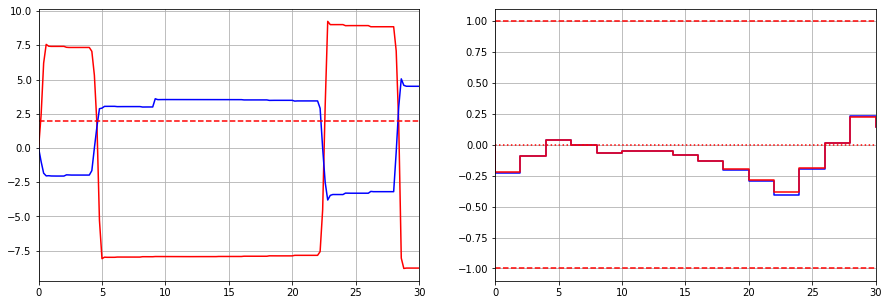

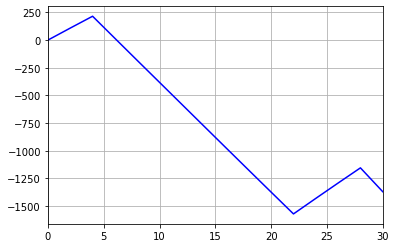

In [ ]:
dT20_init = 9.0
dT20_finish = 19.0
change_time = 9.0
goal = 2.0
gain = 50
step = 2.0
mod_step = 0.2
tk=30.0
x0=[0.0, 0.0]

func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)
reg = AKAR_i(goal=goal, gain=gain, dt=step, T1=1, T2=0.1, T3=10, dT20=1.0)
res = calculate(func_ctrl, x0, mod_step, tk, reg)
plot_result(time=res['t'], time_end=tk, x1 = res['x1'], x2 = res['x2'], plc=reg, goal=goal)

tend = tk
plt.figure()
plt.plot(reg.zt, reg.z, 'b-')
plt.xlim([0.0, tk])
plt.grid()
plt.show()

# **Метод АКАР с идентификацией неизмеряемого параметра**

**Модель системы:**

$\dot T2 = -18T1-0.1T2^3+dT20+{cos(2T2+4)} -6 $,

$\dot T1 = -0.1T1^3+5T1{sin(8T2+7)+30tanh(I)+6}$,

Постановка задачи идентификации на основе модели линейной регрессии

$\dot T2 = \theta(-0.1T2^3+{cos(2T2+4)}) -18T1+dT20-6$

$y=ax+b$

$a = \theta$

$b = dT20$

$y = \dot T2 +18T1 + 6$

$x = -0.1T2^3+{cos(2T2+4)}$

Cинтез управления:

In [ ]:
import sympy
from sympy.functions import exp
from sympy.solvers import solve

# Символьные переменные:
T2=sympy.symbols('T2')
T1=sympy.symbols('T1')
dT20=sympy.symbols('dT20')
I=sympy.symbols('I')
G = sympy.symbols("G")
T2d=sympy.symbols('T2d')
z = sympy.symbols('z')
a = sympy.symbols("a")
dT2D = sympy.symbols("dT2_d")

# Уравнения системы:
DT2 = -18.0*T1+dT20+a*(-0.1*T2**3+sympy.cos(2.0*T2+4.0))-6.0
DT1 = -0.1*T1**3+5.0*T1*sympy.sin(8.0*T2+7.0)+G*I+6.0

DT2D = dT2D  - T2

# Решим полученное уравнение относительно T1:
T1D=solve(DT2-DT2D, T1)
print("T1 = "+str(T1D[0]))

# Задание гиперповерхности:
psi = T1D[0] - T1

# расчет производной:
dpsi = sympy.diff(psi, T2)*DT2 + sympy.diff(psi, T1)*DT1
print("Производная dpsi/dt = ", dpsi)
print()

# Эталонная модель:
print("dpsi/dt + psi = ", sympy.expand(dpsi+psi))
print()

# Решение относительно I:
i = sympy.expand(dpsi + psi + G*I) / G

print('Закон управления по методу АКАР для макропеременной psi = ' + str(psi))
print()

print("I = ", i)


T1 = -0.00555555555555556*T2**3*a + 0.0555555555555556*T2 + 0.0555555555555556*a*cos(2.0*T2 + 4.0) + 0.0555555555555556*dT20 - 0.0555555555555556*dT2_d - 0.333333333333333
Производная dpsi/dt =  -G*I + 0.1*T1**3 - 5.0*T1*sin(8.0*T2 + 7.0) + (-0.0166666666666667*T2**2*a - 0.111111111111111*a*sin(2.0*T2 + 4.0) + 0.0555555555555556)*(-18.0*T1 + a*(-0.1*T2**3 + cos(2.0*T2 + 4.0)) + dT20 - 6.0) - 6.0

dpsi/dt + psi =  -G*I + 0.1*T1**3 + 0.3*T1*T2**2*a + 2.0*T1*a*sin(2.0*T2 + 4.0) - 5.0*T1*sin(8.0*T2 + 7.0) - 2.0*T1 + 0.00166666666666667*T2**5*a**2 + 0.0111111111111111*T2**3*a**2*sin(2.0*T2 + 4.0) - 0.0111111111111111*T2**3*a - 0.0166666666666667*T2**2*a**2*cos(2.0*T2 + 4.0) - 0.0166666666666667*T2**2*a*dT20 + 0.1*T2**2*a + 0.0555555555555556*T2 - 0.111111111111111*a**2*sin(2.0*T2 + 4.0)*cos(2.0*T2 + 4.0) - 0.111111111111111*a*dT20*sin(2.0*T2 + 4.0) + 0.666666666666667*a*sin(2.0*T2 + 4.0) + 0.111111111111111*a*cos(2.0*T2 + 4.0) + 0.111111111111111*dT20 - 0.0555555555555556*dT2_d - 6.66666666

Закон управления:

$I =  (0.1T1^3 + 0.3T1T2^2a + 2T1asin(2T2 + 4) - 5T1sin(8T2 + 7) - 2T1 + 0.00166666666666667T2^5a^2 + 0.0111111111111111T2^3a^2sin(2T2 + 4) - 0.0111111111111111T2^3a - 0.0166666666666667T2^2a^2cos(2T2 + 4) - 0.0166666666666667T2^2adT20 + 0.1T2^2a + 0.0555555555555556T2 - 0.111111111111111a^2sin(2T2 + 4)cos(2T2 + 4) - 0.111111111111111adT20sin(2T2 + 4) + 0.666666666666667asin(2T2 + 4) + 0.111111111111111acos(2T2 + 4) + 0.111111111111111dT20 - 0.0555555555555556dT2_d - 6.66666666666667)/G$

Реализация адаптивного регулятора:

In [ ]:
import math
import numpy as np
import sklearn.linear_model as linmod

class ADCS_ident(PLC):
    def __init__(self, goal, gain, dt, history_len):
        super(ADCS_ident,self).__init__(gain, dt)
        self.G = gain
        self.dT2_d = goal
        self.x_history = []
        self.x_history_len = history_len
        self.dt = dt
        self.coeff = {'t':[0.0], 'a':[0.0], 'b':[0.0]}
        self.xx = []
        self.yy = []

    def transform(self, x, t):
        T2, T1 = x
        return [T2, T1, -0.1*math.pow(T2, 3)+math.cos(2*T2+4)]

    def identification(self, x, t):
        self.x_history.append(x)
        if len(self.x_history) > self.x_history_len:
            self.x_history.pop(0)
        if len(self.x_history) > 1:
            self.xx.append(self.transform(x, t)[-1])
            # Нахождение правой части (неизвестные части системы)
            z = np.array([self.transform(zi, t) for zi in (np.array(self.x_history)[:-1])])
            # Аппроксимация производной:
            y = np.diff(np.array(self.x_history),axis=0)/self.dt
            # Нахождение левой части (известные части системы)
            y1 = y[:,0] + 18*z[:,1] + 6
            self.yy.append(y1[-1])
            model = linmod.LinearRegression(normalize=True)
            model.fit(X=z[:,2].reshape(-1,1), y=y1)
            self.coeff['t'].append(t)
            self.coeff['a'].append(model.coef_)
            self.coeff['b'].append(model.intercept_)

    def control(self, x, t):
        self.identification(x, t)
        T2, T1 = x
        dT20 = self.coeff['b'][-1]
        a = self.coeff['a'][-1]
        G = self.gain
        dT2_d = self.dT2_d
        return  (0.1*T1**3 + 0.3*T1*T2**2*a + 2.0*T1*a*math.sin(2.0*T2 + 4.0) - 5.0*T1*math.sin(8.0*T2 + 7.0) - 2.0*T1 +
                 0.00166666666666667*T2**5*a**2 + 0.0111111111111111*T2**3*a**2*math.sin(2.0*T2 + 4.0) - 0.0111111111111111*T2**3*a -
                 0.0166666666666667*T2**2*a**2*math.cos(2.0*T2 + 4.0) - 0.0166666666666667*T2**2*a*dT20 + 0.1*T2**2*a +
                 0.0555555555555556*T2 - 0.111111111111111*a**2*math.sin(2.0*T2 + 4.0)*math.cos(2.0*T2 + 4.0) -
                 0.111111111111111*a*dT20*math.sin(2.0*T2 + 4.0) + 0.666666666666667*a*math.sin(2.0*T2 + 4.0) +
                 0.111111111111111*a*math.cos(2.0*T2 + 4.0) + 0.111111111111111*dT20 - 0.0555555555555556*dT2_d - 6.66666666666667)/G

Моделирование

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

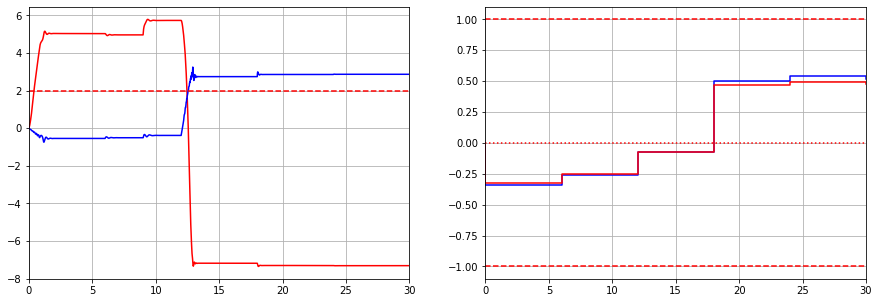

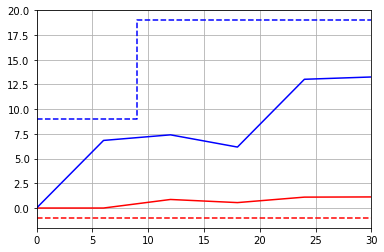

In [ ]:
dT20_init = 9.0
dT20_finish = 19.0
change_time = 9.0
goal = 2.0
gain = 20
step = 6
mod_step = 0.02
tk=30.0
x0=[0.0, 0.0]

func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)
reg = AKAR_i(goal=goal, gain=gain, dt=step, T1=10, T2=0.1, T3=10, dT20=1.0)

history_len = 300

reg = ADCS_ident(goal=goal, gain=gain, dt=step, history_len=history_len)

res = calculate(func_ctrl, x0, mod_step, tk, reg)
plot_result(time=res['t'], time_end=tk, x1 = res['x1'], x2 = res['x2'], plc=reg, goal=goal)

tend = tk
plt.figure()
plt.plot(reg.coeff['t'], reg.coeff['a'], 'r', [0, tk], [-1, -1], 'r--',
         reg.coeff['t'], reg.coeff['b'], 'b', [0, change_time, change_time, tk], [dT20_init, dT20_init, dT20_finish, dT20_finish], 'b--')

plt.xlim([0, tk])
plt.grid()
plt.show()

# **Система прямого адаптивного управления с обобщенной ошибкой настройки**

Вводим функцию обобщенной ошибки, в которой есть эталонная модель $ddy + 3dy + 2dy$ с ошибкой $y = T2d  - T2$

Управление в данном случае будет иметь вид:

$I = c_1T2 + c_2T1 + c_3$

Найдем коэффициенты $c_1, c_2, c_3$ для нашей модели

In [ ]:
class ADCS_gerr(PLC):
    def __init__(self, goal, gain, speed, dt):
        super(ADCS_gerr,self).__init__(gain,step=dt)
        self.g = speed
        self.Pd = goal
        self.dt = dt
        self.c10 = 0.0
        self.c20 = 0.0
        self.c30 = 0.0
        self.coeff = {'t':[], 'c1':[], 'c2':[], 'c3':[], 'y':[], 'dy':[], 'ddy':[], 'sigma':[]}
        self.y_last = None
        self.y_last_last = None

    def optimize(self, x, t):
        y = x[0] - self.Pd
        self.coeff['t'].append(t)
        self.coeff['y'].append(y)
        if self.y_last_last is not None:
            dy = (y - self.y_last)/self.dt
            ddy = (self.y_last - 2.0*self.y_last + self.y_last_last) / (self.dt**2)
            sigma = ddy + 3.0*dy + 2.0*y
            self.coeff['sigma'].append(sigma)

            c1 = self.coeff['c1'][-1]
            c2 = self.coeff['c2'][-1]
            c3 = self.coeff['c3'][-1]

            c1 = c1 - self.g*sigma*x[0]
            c2 = c2 - self.g*sigma*x[1]
            c3 = c3 - self.g*sigma

            self.coeff['c1'].append(c1)
            self.coeff['c2'].append(c2)
            self.coeff['c3'].append(c3)
        else:
            self.coeff['sigma'].append(0.0)
            self.coeff['c1'].append(self.c10)
            self.coeff['c2'].append(self.c20)
            self.coeff['c3'].append(self.c30)

        if self.y_last is not None:
            self.y_last_last = self.y_last

        self.y_last = y

    def control(self, x, t):
        self.optimize(x, t)

        c1 = self.coeff['c1'][-1]
        c2 = self.coeff['c2'][-1]
        c3 = self.coeff['c3'][-1]

        return c1*x[0] + c2*x[1] + c3

Моделирование

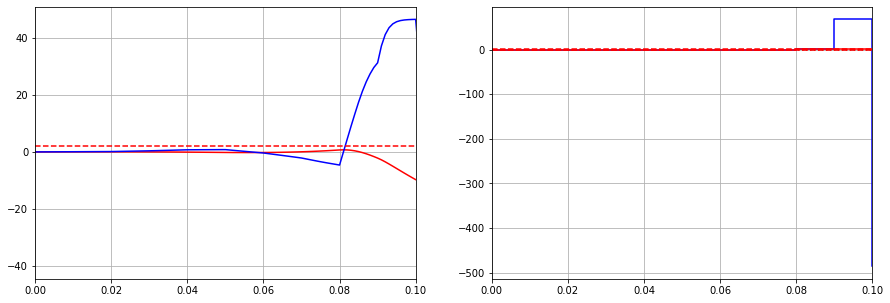

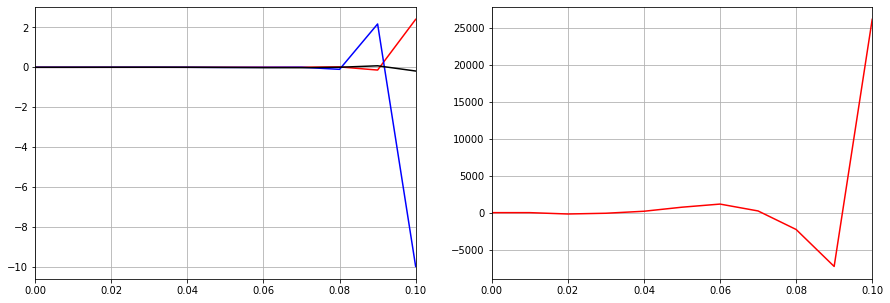

In [ ]:
dT20_init = 9.0
dT20_finish = 19.0
change_time = 9.0
goal = 2.0
gain = 10000
step = 0.01
mod_step = 0.001
tk=0.1
x0=[0.0, 0.0]

func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)
reg = AKAR_i(goal=goal, gain=gain, dt=step, T1=1, T2=0.1, T3=1, dT20=1.0)

reg = ADCS_gerr(goal=goal, gain=gain, dt=step, speed=0.00001)
res = calculate(func_ctrl, x0, mod_step, tk, reg)
plot_result(time=res['t'], time_end=tk, x1 = res['x1'], x2 = res['x2'], plc=reg, goal=goal)

tend = tk

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(reg.coeff['t'], reg.coeff['c1'], 'r',
         reg.coeff['t'], reg.coeff['c2'], 'b',
         reg.coeff['t'], reg.coeff['c3'], 'k')
plt.xlim([0, tk])
plt.grid()
plt.subplot(1,2,2)
plt.plot(reg.coeff['t'], reg.coeff['sigma'], 'r')
plt.grid()
plt.xlim([0, tk])
plt.show()

На графиках выше изображены изменения параметров системы при использовании модели адаптивной системы с обобщенной ошибкой настройки

# **Система прямого адаптивного управления на основе метода скоростного градиента**

Управление, как и в случае с обобщенной ошибкой настройки, будет иметь вид:

$I = c_1T2 + c_2T1 + c_3$

Необходимо определить коэффициенты $c_1, c_2, c_3$ для нашей модели

Целевая функция:

$Q=T2^2$

Данный пример системы, моделируемой на основе метода скоростного градиента, отличается от ранее рассмотренной системы с обобщенной ошибкой настройки, только величинами коррекции неизвестных коэффицинтов. И в данном примере нет необходимости вычислять производные значений показаний датчиков.

In [ ]:
class ADCS_spgrad(PLC):
    def __init__(self, goal, gain, speed, dt):
        super(ADCS_spgrad,self).__init__(gain, dt)
        self.g = speed
        self.Pd = goal
        self.dt = dt
        self.c10 = 0.0
        self.c20 = 0.0
        self.c30 = 0.0
        self.coeff = {'t':[], 'c1':[], 'c2':[], 'c3':[], 'y':[], 'Q':[]}

    def optimize(self, x, t):
        y = x[0] - self.Pd
        Q = y**2

        self.coeff['t'].append(t)
        self.coeff['y'].append(y)
        self.coeff['Q'].append(Q)

        if len(self.coeff['c1'])>0:
            c1 = self.coeff['c1'][-1]
            c2 = self.coeff['c2'][-1]
            c3 = self.coeff['c3'][-1]
        else:
            c1 = 0.0
            c2 = 0.0
            c3 = 0.0

        c1 = c1 - self.g*y*x[0]
        c2 = c2 - self.g*y*x[1]
        c3 = c3 - self.g*y

        self.coeff['c1'].append(c1)
        self.coeff['c2'].append(c2)
        self.coeff['c3'].append(c3)

    def control(self, x, t):
        self.optimize(x, t)

        c1 = self.coeff['c1'][-1]
        c2 = self.coeff['c2'][-1]
        c3 = self.coeff['c3'][-1]

        return c1*x[0] + c2*x[1] + c3

Моделирование

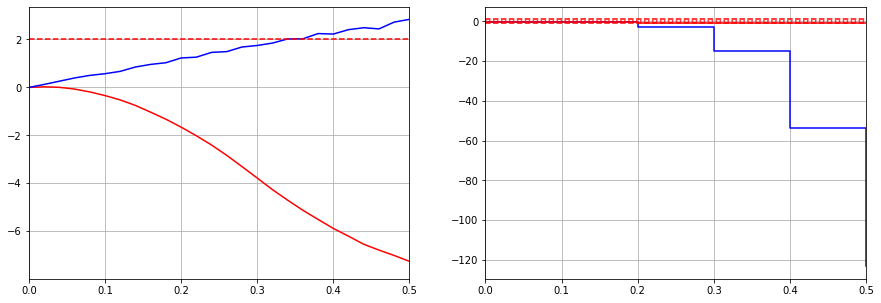

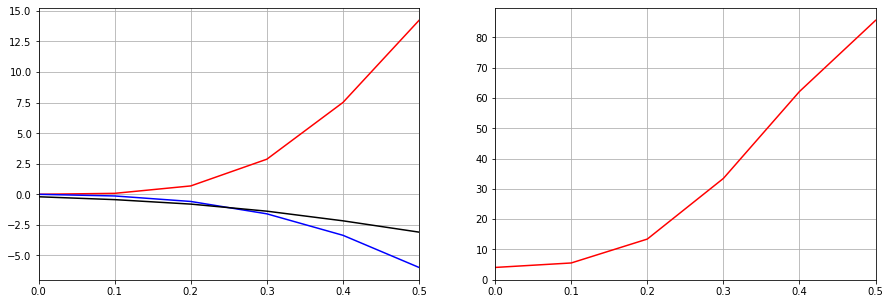

In [ ]:
dT20_init = 9.0
dT20_finish = 19.0
change_time = 9.0
goal = 2.0
gain = -0.1
step = 0.1
mod_step = 0.02
tk=0.5
x0=[0.0, 0.0]

func_ctrl = F_with_change(change_time,dT20_init,dT20_finish)
reg = AKAR_i(goal=goal, gain=gain, dt=step, T1=1, T2=0.1, T3=10, dT20=1.0)

reg = ADCS_spgrad(goal=goal, gain=gain, dt=step, speed=-0.1)
res = calculate(func_ctrl, x0, mod_step, tk, reg)
plot_result(time=res['t'], time_end=tk, x1 = res['x1'], x2 = res['x2'], plc=reg, goal=goal)

tend = tk

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(reg.coeff['t'], reg.coeff['c1'], 'r',
         reg.coeff['t'], reg.coeff['c2'], 'b',
         reg.coeff['t'], reg.coeff['c3'], 'k')
plt.xlim([0, tk])
plt.grid()
plt.subplot(1,2,2)
plt.plot(reg.coeff['t'], reg.coeff['Q'], 'r')
plt.grid()
plt.xlim([0, tk])
plt.show()

На графиках выше изображены изменения параметров системы при использовании модели скоростного градиента